In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [2]:
# Load the dataset from the local file system
data = pd.read_csv('data.csv', parse_dates=['Date'], index_col='Date')

In [3]:
# Select a column for analysis (e.g., 'A')
selected_column = 'A'
time_series = data[selected_column]

In [4]:
# Rolling Statistics
rolling_mean = time_series.rolling(window=3).mean()  # Adjusted window size for small dataset
rolling_std = time_series.rolling(window=3).std()

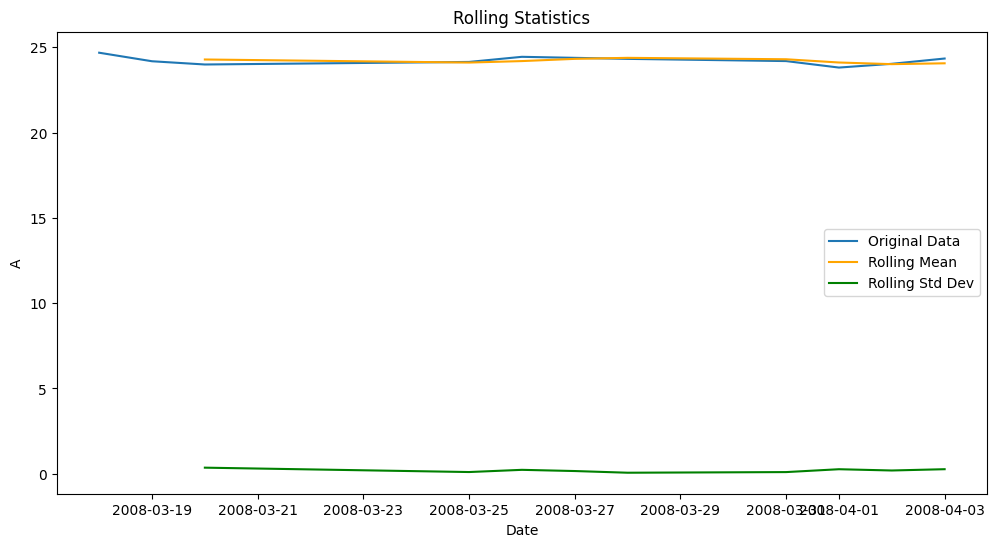

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Original Data')
plt.plot(rolling_mean, label='Rolling Mean', color='orange')
plt.plot(rolling_std, label='Rolling Std Dev', color='green')
plt.title('Rolling Statistics')
plt.xlabel('Date')
plt.ylabel(selected_column)
plt.legend()
plt.show()

In [6]:
# Augmented Dickey-Fuller Test
result = adfuller(time_series)
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print(f"Critical Values: {result[4]}")

ADF Statistic: -3.223868607200133
p-value: 0.018643980204495047
Critical Values: {'1%': -4.473135048010974, '5%': -3.28988060356653, '10%': -2.7723823456790124}


In [7]:
if result[1] > 0.05:
    differenced_data = time_series.diff().dropna()
    plt.figure(figsize=(12, 6))
    plt.plot(differenced_data, label='Differenced Data')
    plt.title('Differenced Time Series')
    plt.xlabel('Date')
    plt.ylabel(selected_column)
    plt.legend()
    plt.show()

In [9]:
differenced_data = time_series.diff().dropna()

# Perform ADF test on differenced data
result_diff = adfuller(differenced_data)
print(f"Differenced ADF Statistic: {result_diff[0]}")
print(f"Differenced p-value: {result_diff[1]}")
print(f"Differenced Critical Values: {result_diff[4]}")

Differenced ADF Statistic: -3.3773165148992135
Differenced p-value: 0.011756887902814511
Differenced Critical Values: {'1%': -5.354256481481482, '5%': -3.6462381481481483, '10%': -2.901197777777778}
